In this notebook, we will use the location of ISS to generate a FOV of the surrounding area which will then be used in later steps for image matching.

In [ ]:
import pandas as pd

#extracted and organized location data for easy retrival

data = [
    {"Image": "iss065e012968", "Location": "23.742209, 120.791696"},
    {"Image": "iss065e012854", "Location": "24.399968, 39.580929"},
    {"Image": "iss065e012122", "Location": "21.916841, 17.409515"},
    {"Image": "iss040e092721", "Location": "37.901332, 15.333352"},
    {"Image": "iss040e125148", "Location": "51.959667, 4.072454"},
    {"Image": "iss041e011621", "Location": "35.701982, -6.030937"},
    {"Image": "iss041e109444", "Location": "37.835201, 14.974987"},
    {"Image": "iss042e062108", "Location": "35.036677, 33.334408"},
    {"Image": "iss050e070478", "Location": "40.743988, -73.987878"},
    {"Image": "iss050e070882", "Location": "-43.750603, 170.569065"},
    #{"Image": "iss051e040689", "Location": "Al Bahah Saudi Arabia"},
    {"Image": "iss052e000904", "Location": "50.860032, 155.561931"},
    {"Image": "iss052e000909", "Location": "53.258150, 159.816732"},
    {"Image": "iss052e018433", "Location": "-19.298689, 22.816294"},
    {"Image": "iss052e026898", "Location": "-16.724124, -151.455016"},
    {"Image": "iss052e027063", "Location": "-12.979071, -75.327700"},
    {"Image": "iss052e030452", "Location": "37.819265, -122.349650"},
    {"Image": "iss052e032999", "Location": "-30.581933, -50.460110"},
    {"Image": "iss052e033010", "Location": "-22.932386, -42.045236"},
    {"Image": "iss052e033280", "Location": "46.608744, 33.093659"},
    {"Image": "iss052e033339", "Location": "-12.788668, 45.135262"},
    {"Image": "iss052e035012", "Location": "46.175399, 48.478621"},
    {"Image": "iss052e035014", "Location": "25.264623, -110.943803"},
    {"Image": "iss052e035035", "Location": "-39.316253, 174.131472"},
    {"Image": "iss052e035055", "Location": "34.019039, -118.359388"},
    {"Image": "iss052e035185", "Location": "31.068361, 34.004350"},
    {"Image": "iss052e035201", "Location": "39.186166, 14.403339"},
    {"Image": "iss052e035257", "Location": "28.284419, -16.664628"},
    {"Image": "iss052e035339", "Location": "41.842406, -70.065274"},
    {"Image": "iss053e126192", "Location": "33.407708, -5.138098"},
    {"Image": "iss053e464812", "Location": "41.577221, 10.978870"},
    {"Image": "iss054e062904", "Location": "35.588036, 139.778779"},
    {"Image": "iss056e005404", "Location": "24.882797, -81.266813"},
    {"Image": "iss058e027750", "Location": "21.342792, -157.456320"},
    {"Image": "iss057e115124", "Location": "34.628620, 54.601982"},
    {"Image": "iss053e134168", "Location": "41.208593, -112.496396"},
    {"Image": "iss065e053098", "Location": "38.789770, -78.739180"},
    {"Image": "iss067e002052", "Location": "-28.420933, 137.185175"},
    {"Image": "iss065e054515", "Location": "40.143393, 26.397470"},
    {"Image": "iss065e054537", "Location": "40.351718, 26.664388"},
    {"Image": "iss040e075028", "Location": "36.327837, -112.045507"},
    {"Image": "iss055e064313", "Location": "32.781041, -96.818281"},
    {"Image": "iss055e064533", "Location": "11.439274, -15.756710"},
    {"Image": "iss063e002317", "Location": "34.035573, -4.945600"},
    {"Image": "iss063e016842", "Location": "-4.257872, 39.485015"},
    {"Image": "iss055e114813", "Location": "31.294883, 35.323651"},
    {"Image": "iss055e114728", "Location": "-27.443711, 153.112493"},
    {"Image": "iss065e013079", "Location": "29.333794, 30.680242"},
    {"Image": "iss065e013101", "Location": "12.508879, 43.366674"},
    {"Image": "iss065e013131", "Location": "37.972478, -122.042438"},
    {"Image": "iss065e013167", "Location": "32.590144, -117.079155"},
    {"Image": "iss065e012973", "Location": "30.665248, 121.229966"},
    {"Image": "iss065e012990", "Location": "34.992024, 136.568165"},
    {"Image": "iss065e013068", "Location": "29.454869, 31.658554"},
    {"Image": "iss065e013070", "Location": "29.346051, 35.916086"},
    {"Image": "iss065e013072", "Location": "26.642039, 31.762687"},
    {"Image": "iss065e013073", "Location": "28.586666, 34.038843"},
    {"Image": "iss065e013074", "Location": "29.280825, 35.143501"},
    {"Image": "iss065e012550", "Location": "18.324289, -77.722524"},
    {"Image": "iss065e012914", "Location": "23.007176, -78.684280"},
    {"Image": "iss065e013077", "Location": "30.980757, 29.932224"},
    {"Image": "iss065e020850", "Location": "41.876768, -87.640349"},
    {"Image": "iss065e021034", "Location": "34.071877, -118.259328"},
    {"Image": "iss065e021246", "Location": "38.669212, 1.502870"},
    {"Image": "iss065e021254", "Location": "38.705129, 1.415840"},
    {"Image": "iss065e053078", "Location": "25.243304, 51.182826"},
    {"Image": "iss065e053081", "Location": "31.583607, 54.562364"},
    {"Image": "iss065e053554", "Location": "30.032425, 31.425661"},
    {"Image": "iss064e028560", "Location": "24.571098, -81.755239"},
    {"Image": "iss063e079300", "Location": "42.854284, -113.039808"},
    {"Image": "iss063e078453", "Location": "-23.480128, -46.526761"},
    {"Image": "iss063e096070", "Location": "-3.058572, 36.019304"},
    {"Image": "iss065e069380", "Location": "42.061955, -70.161285"},
    {"Image": "iss065e067381", "Location": "37.488183, 38.321200"},
    {"Image": "iss065e067263", "Location": "33.866825, 35.503391"},
    {"Image": "iss065e067142", "Location": "31.218129, 32.326817"},
    {"Image": "iss065e067016", "Location": "29.984476, 31.138976"},
    {"Image": "iss065e066969", "Location": "22.269240, 24.672727"},
    {"Image": "iss065e061367", "Location": "25.071802, 55.186640"},
    {"Image": "iss065e066639", "Location": "44.790875, 20.465951"},
    {"Image": "iss065e066626", "Location": "42.923349, 17.546381"},
    {"Image": "iss065e066599", "Location": "40.730257, 13.904558"},
    {"Image": "iss065e066594", "Location": "40.755071, 14.537456"},
    {"Image": "iss065e066583", "Location": "37.270417, 9.869572"},
    {"Image": "iss065e061183", "Location": "29.564757, 34.546685"},
    {"Image": "iss065e057164", "Location": "31.790376, 35.214337"},
    {"Image": "iss065e057097", "Location": "38.483497, 27.124290"},
    {"Image": "iss061e112874", "Location": "-2.228839, -80.940087"},
    {"Image": "iss065e028128", "Location": "36.074243, -114.742723"},
    {"Image": "iss065e028059", "Location": "19.026214, -15.745933"},
    {"Image": "iss065e053056", "Location": "12.085433, 37.309872"},
    {"Image": "iss065e053067", "Location": "13.703834, 40.725732"},
    {"Image": "iss065e053070", "Location": "15.274644, 33.167073"},
    {"Image": "iss065e053450", "Location": "41.870455, 12.559192"},
    {"Image": "iss065e053870", "Location": "37.981315, 23.734243"},
    {"Image": "iss065e055715", "Location": "-7.213312, 31.278937"},
    {"Image": "iss065e056990", "Location": "38.345924, 22.534869"},
    {"Image": "iss065e056234", "Location": "10.514569, 43.972472"},
    {"Image": "iss065e054848", "Location": "-25.664862, 16.365707"},
    {"Image": "iss065e056976", "Location": "38.440670, 21.308959"},
    {"Image": "iss065e023017", "Location": "48.358970, 96.102511"},
    {"Image": "iss065e021241", "Location": "38.344237, -0.495215"},
    {"Image": "iss065e021023", "Location": "33.946956, -118.414378"},
    {"Image": "iss065e020909", "Location": "39.745820, -104.987995"},
    {"Image": "iss057e114908", "Location": "33.736854, -118.207804"},
    {"Image": "iss061e112024", "Location": "19.023329, -98.634386"},
    {"Image": "iss065e012335", "Location": "32.183196, 45.610264"},
    {"Image": "iss060e036678", "Location": "38.942758, -8.375745"},
    {"Image": "iss064e033296", "Location": "51.985828, -55.492625"},
    {"Image": "iss064e031416", "Location": "52.579742, 5.533420"},
    {"Image": "iss064e035644", "Location": "47.237943, -90.017730"},
    {"Image": "iss061e112769", "Location": "16.871856, -99.847748"},
    {"Image": "iss054e021952", "Location": "35.430217, 140.268560"},
    {"Image": "iss040e065496", "Location": "-19.074847, 22.526239"},
    {"Image": "iss057e114935", "Location": "34.041358, -118.270602"},
    {"Image": "iss061e111827", "Location": "38.088082, -122.070298"},
    {"Image": "iss064e027837", "Location": "-22.794843, -43.242388"},
    {"Image": "iss064e028123", "Location": "37.879199, 14.517200"},
    {"Image": "iss063e043605", "Location": "20.917666, -11.450432"},
    {"Image": "iss063e044752", "Location": "-21.811483, 14.046979"},
    {"Image": "iss063e036877", "Location": "39.183225, -120.073817"},
    {"Image": "iss063e097910", "Location": "-30.120670, -66.380514"},
    {"Image": "iss063e088525", "Location": "-47.425904, -71.880462"},
    {"Image": "iss063e088491", "Location": "-49.496582, -73.074898"},
    {"Image": "iss063e088058", "Location": "-15.551153, -72.615401"},
    {"Image": "iss063e088041", "Location": "-15.466468, -72.617483"},
    {"Image": "iss063e040232", "Location": "21.430234, -157.801064"},
    {"Image": "iss063e070326", "Location": "37.119323, -8.555543"},
    {"Image": "iss063e069023", "Location": "50.541404, -88.938030"},
    {"Image": "iss063e059453", "Location": "39.333892, -76.624956"},
    {"Image": "iss063e051062", "Location": "-15.524561, -68.958675"},
    {"Image": "iss063e038494", "Location": "41.978646, -87.896346"},
    {"Image": "iss063e038420", "Location": "6.042421, -55.236238"},
    {"Image": "iss063e017343", "Location": "41.226935, 61.581840"},
    {"Image": "iss063e019722", "Location": "26.695292, 92.910360"},
    {"Image": "iss063e021035", "Location": "43.561849, -6.001638"},
    {"Image": "iss063e020911", "Location": "28.619010, -80.655151"},
    {"Image": "iss038e064247", "Location": "41.945297, 12.499344"},
    {"Image": "iss055e114738", "Location": "-27.110347, 153.204186"},
    {"Image": "iss056e126635", "Location": "22.511201, 32.948643"},
    {"Image": "iss036e049939", "Location": "-3.061136, 37.352760"},
    {"Image": "iss057e114906", "Location": "33.245924, -119.475401"},
    {"Image": "iss055e114459", "Location": "-17.620422, 139.094148"}
]



df = pd.DataFrame(data)





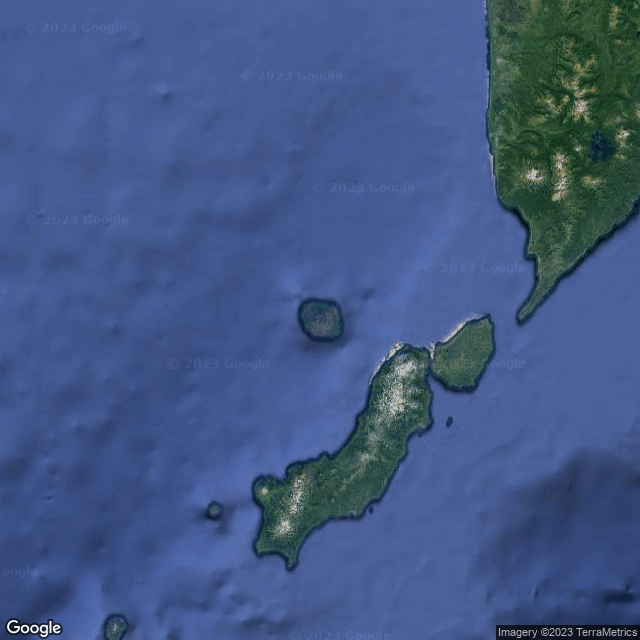

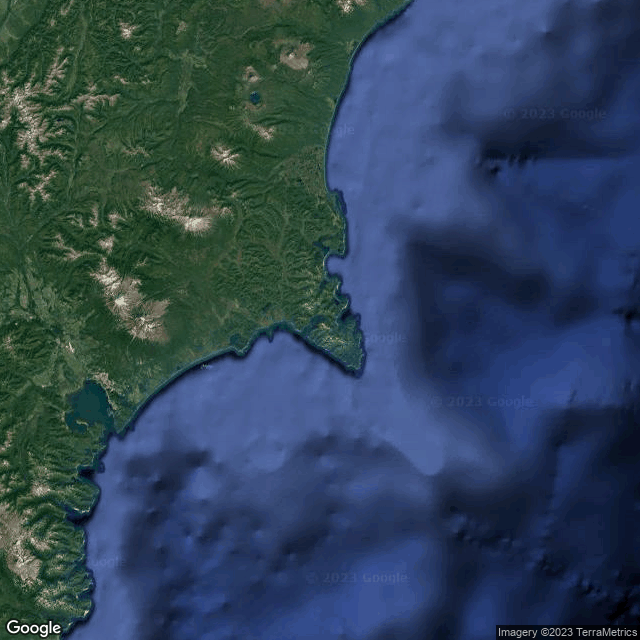

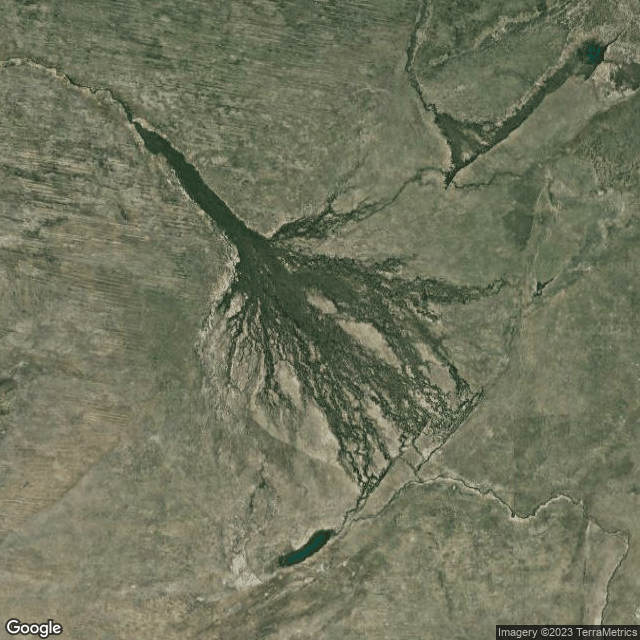

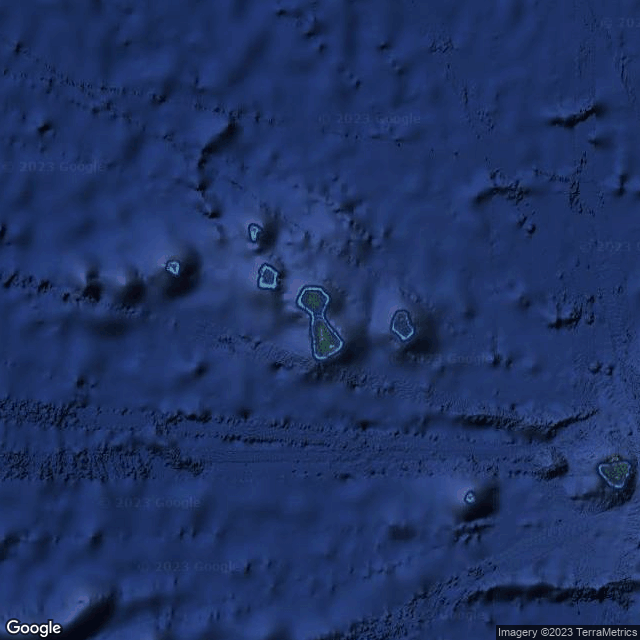

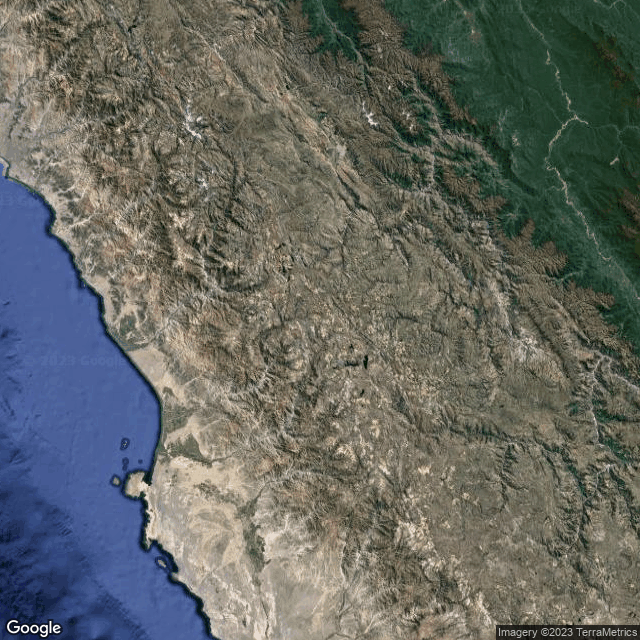

In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO

def load_and_fetch_images(api_key, num_requests, start_row=0, end_row=None):
    """
    Load manually created dataset, and fetch map images based on the coordinates and image names.

    :param api_key: Google Maps Static API Key
    :param num_requests: Number of API requests to make
    :param start_row: Starting index of rows to process (inclusive)
    :param end_row: Ending index of rows to process (exclusive)
    """

    df = pd.DataFrame(data)

    # If end_row is None, process until the last row
    if end_row is None:
        end_row = len(df)

    # Counter for the number of requests
    count = 0

    # Iterate over each row within the specified range and fetch images
    for index, row in df.iloc[start_row:end_row].iterrows():
        if count >= num_requests:
            break

        # Split the coordinates into latitude and longitude
        lat, lon = map(float, row['Location'].split(','))  # Adjusted column name with correct capitalization

        # Get the image name
        img_filename = f"{row['Image']}.png"  # Adjusted column name to 'Image'

        # Fetch and save the image
        fetch_map_image(lat, lon, zoom=8, api_key=api_key, img_filename=img_filename)

        count += 1



def fetch_map_image(lat, lon, zoom, api_key, img_filename):
    """
    Fetches map images based on latitude, longitude, and zoom level.
    Returns a PIL Image object.
    """
    # Define the endpoint URL
    endpoint_url = f"https://maps.googleapis.com/maps/api/staticmap"

    # Parameters
    params = {
        'center': f'{lat},{lon}',
        'zoom': zoom,
        'size': '1000x1000',  # You can customize the size
        'maptype': 'satellite',  # Set maptype to satellite
        'style': 'feature:all|element:labels|visibility:off',  # This style hides all labels
        'key': api_key
    }

    response = requests.get(endpoint_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        image.save(img_filename)  # Save the image using the provided filename
        display(image)  # Display the image in the IPython environment
        return image
    else:
        print(f"Error: Unable to fetch the image. Status code: {response.status_code}")
        return None

# Usage example
load_and_fetch_images('Enter API Key here', num_requests=5, start_row=10)
